In [ ]:
# compute tf-idf
# measure similarity internally and externally per Q (and average across Qs)
# content similarity
# (vs city rec similarity)

#create a pandas dataframe
# (1) tf-idf it on the per justification level (5 doc per response)
# (2) tf-idf it on the response level (n doc for n responses)
# apply Kendall Tau to compare (1) and (2)

In [101]:
#create a pandas dataframe
import pandas as pd
path = '/Users/shirandudy/Documents/Documents_new/NEU/projects/cities_representation/code'
final_path = path+'/all_models.csv'
df = pd.read_csv(final_path)
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.reset_index()
df


,model,situation,prompt,rec_city1,rec_reasons1,rec_city2,rec_reasons2,rec_city3,rec_reasons3,rec_city4,rec_reasons4,rec_city5,rec_reasons5
0,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,Vibrant nightlife and social opportunities;Wal...,Hoboken,Walkable waterfront with parks and views of Ma...,Montclair,Vibrant arts and cultural scene;Walkable downt...,Princeton,Highly ranked schools and safe neighborhoods;V...,Summit,Vibrant downtown area with a variety of restau...
1,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,"Vibrant nightlife with numerous bars, restaura...",Hoboken,"Walkable downtown area with numerous bars, res...",Montclair,Vibrant arts and cultural scene with numerous ...,Princeton,Home to prestigious universities and research ...,Red Bank,"Vibrant downtown area with numerous bars, rest..."
2,mistral,relocation,I am making the move to New Jersey for a job p...,Jersey City,"Vibrant nightlife with numerous bars, restaura...",Hoboken,"Walkable downtown area with numerous bars, res...",Montclair,Vibrant arts and cultural scene with numerous ...,Princeton,Home to prestigious universities and research ...,Red Bank,"Vibrant downtown area with numerous bars, rest..."
3,mistral,relocation,Family moving from Northeast state to Alabama ...,Huntsville,Thriving tech industry with numerous remote wo...,Birmingham,Abundant job opportunities in various industri...,Montgomery,State capital with a rich history and cultural...,Auburn,"Home to Auburn University, a top-ranked public...",Mobile,Historic port city with a rich cultural herita...
4,mistral,relocation,Family moving from Northeast state to Alabama ...,Huntsville,Thriving tech industry with numerous remote wo...,Birmingham,Largest city in Alabama with a diverse economy...,Montgomery,State capital with a rich history and a growin...,Auburn,"Home to Auburn University, one of the top publ...",Tuscaloosa,"Home to the University of Alabama, one of the ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,gemma,opening_business,"I don't plan on opening a business just yet, m...","Arlington, VA",Strong foodie scene with diverse cuisine;Proxi...,"Bethesda, MD",Proximity to major transportation hubs;Mix of ...,"Rockville, MD",Affordable cost of living;Strong sense of comm...,"Silver Spring, MD",Diverse population and cultural offerings;Prox...,"Reston, VA",High concentration of technology and healthcar...
194,gemma,opening_business,"I don't plan on opening a business just yet, m...","Arlington, VA",Strong foodie scene with diverse cuisine;Proxi...,"Bethesda, MD",Proximity to major transportation hubs;Mix of ...,"Rockville, MD",Affordable cost of living;Strong sense of comm...,"Silver Spring, MD",Diverse population and cultural offerings;Prox...,"Reston, VA",High concentration of technology and healthcar...
195,gemma,opening_business,What VA city/town/area is in need of a high qu...,"Charlottesville, VA",Lack of high-quality bakery/pizzeria options;G...,"Roanoke, VA",Limited access to quality baked goods and pizz...,"Lynchburg, VA",Need for diverse bakery and pizza offerings;In...,"Blacksburg, VA",Lack of diverse bakery and pizza options outsi...,"Harrisonburg, VA",Limited access to fresh baked goods and gourme...
196,gemma,opening_business,What VA city/town/area is in need of a high qu...,"Charlottesville, VA",Lack of high-quality bakery/pizzeria options;G...,"Roanoke, VA",Limited access to quality baked goods and pizz...,"Lynchburg, VA",Need for diverse bakery and pizza offerings;In...,"Blacksburg, VA",Lack of diverse bakery and pizza options outsi...,"Harrisonburg, VA",Limited access to fresh baked goods and gourme...


In [102]:
# (1) tf-idf it on the per justification level (5 doc per response)
# after each response's list is generated compare with kendall Tau and generate a score per response
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize

#import nltk
#nltk.download('punkt')

# create object
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')

# create a vector per row
all_terms = []
all_scores = []
for row in range(len(df.index)):
    res_docs = []
    for rec in ['rec_reasons1', 'rec_reasons2', 'rec_reasons3', 'rec_reasons4', 'rec_reasons5']:
        reason = df.iloc[row][rec]
        reason = reason.replace('\\n','')
        # preprocess text (rm punctuations)
        reason = reason.lower()
        tokens = word_tokenize(reason)
        cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if re.sub(r'[^\w\s]', '', token)]
        #print(cleaned_tokens)
        doc = ' '.join(cleaned_tokens)
        # apprend to list
        res_docs.append(doc) 
    # tf-idf the res_docs
    result = tfidf.fit_transform(res_docs)
    #print(result)
    terms = tfidf.vocabulary_
    sums = result.sum(axis=0)
    # connecting term to its sums frequency
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col] ))

    ranking = pd.DataFrame(data, columns=['term','rank'])
    res_terms = list(ranking.sort_values('rank', ascending=False)[:15]["term"])
    res_scores = list(ranking.sort_values('rank', ascending=False)[:15]["rank"])
    print(res_terms)
    all_terms.append(res_terms)
    all_scores.append(res_scores)
df['term'] = all_terms
df['top_tfidf'] = all_scores


['vibrant', 'bars', 'princeton', 'scene', 'proximity', 'access', 'young', 'facilities', 'shops', 'summit', 'events', 'parks', 'group', 'families', 'concentration']
['universities', 'restaurants', 'service', 'close', 'housing', 'cultural', 'downtown', 'vibrant', 'theaters', 'numerous', 'schools', 'arts', 'affordable', 'bars', 'options']
['universities', 'restaurants', 'service', 'close', 'housing', 'cultural', 'downtown', 'vibrant', 'theaters', 'numerous', 'schools', 'arts', 'affordable', 'bars', 'options']
['auburn', 'proximity', 'williams', 'flight', 'hank', 'academic', 'port', 'redstone', 'industry', 'industries', 'music', 'alabama', 'medical', 'excellent', 'remote']
['facilities', 'industry', 'barber', 'remote', 'crestwood', 'corner', 'vulcan', 'hospital', 'diverse', 'river', 'festivals', 'tech', 'thriving', 'state', 'alabama']
['jordanhare', 'proximity', 'county', 'hank', 'work', 'tech', 'thriving', 'church', 'diverse', 'attractions', 'avenue', 'bay', 'civil', 'fine', 'toptier']
['

In [109]:
#apply Jaccard index (Kendall Tau) to compare responses of the same LLM
import scipy.stats as stats
from collections import defaultdict
import itertools
all_taus = []
all_sys = []
prompts = df.prompt.unique()
for system in ['gemma', 'gpt35', 'anthropic', 'gpt4o', 'llama', 'mistral']:
    
    df_sys = df[df['model']==system] # similarity within the same system
    for prompt in prompts:
        #print(prompt)
        df_prmp = df_sys[df_sys['prompt']==prompt] # similarity within same queries
        #print(df_prmp)
        all_terms = list(df_prmp['term'])
        #print(len(all_terms))
        #print(system)
        d_queries = defaultdict(float)
        for (n_1, n_2) in itertools.combinations(range(len(all_terms)), 2):
            q_1 = all_terms[n_2]
            q_2 = all_terms[n_1]
            #print(q_1)
            #print(q_2)
            #q_2 = list("abcdefghijklmno")
            tau = 1-(2*(len(q_1+q_2)-len(set(q_1+q_2)))/len(q_1+q_2))
            #tau, _ = stats.kendalltau(q_1, q_2)
            d_queries[n_1]+=tau
            d_queries[n_2]+=tau
            #print(tau)
        #print(d_queries)
        for key in d_queries.keys():
            # build list of scores for the plot
            #print(d_queries[key])
            #print(len(all_terms)-1)
            all_taus.append((d_queries[key]/(len(all_terms)-1)))
            #all_taus.append((1-(d_queries[key]/(len(all_terms)-1)))/2)
            # build list of systems for the plot
            all_sys.append(system)    

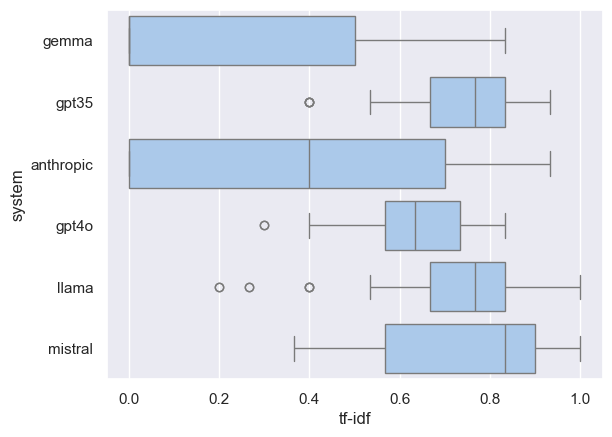

In [108]:
import pandas as pd
import seaborn as sns

jaccard = pd.DataFrame({"system": all_sys, "tf-idf": all_taus})
sns.boxplot(data=jaccard, x="tf-idf", y="system")
#sns.violinplot(data=jaccard, x="Jaccard similarity", y="system", split=True, inner="quart")
sns.set_style("darkgrid")
#g = sns.violinplot(data=jaccard, x="Jaccard Similarity", y="system", inner="point")
#g.set(xlim=(0, 1))


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize

#import nltk
#nltk.download('punkt')

# create object
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')

# apply Jaccard index (Kendall Tau) to compare responses of the same LLM
import scipy.stats as stats
from collections import defaultdict
import itertools

all_taus2 = []
all_sys2 = []


for prompt in prompts: # per prompt
    tf_idf_llm = defaultdict(float)
    df_prmp = df[df['prompt']==prompt]
    
    for system in ['gemma', 'anthropic', 'gpt35', 'gpt4o', 'llama', 'mistral']: # per system
        df_sys = df_prmp[df_prmp['model']==system]
        res_docs = [] # a list of documents or responses for the same prompt
        for row in range(len(df_sys.index)):
            res_doc = ''
            for rec in ['rec_reasons1', 'rec_reasons2', 'rec_reasons3', 'rec_reasons4', 'rec_reasons5']:
                reason = df_sys.iloc[row][rec]
                reason = reason.replace('\\n','')
                # preprocess text (rm punctuations)
                reason = reason.lower()
                tokens = word_tokenize(reason)
                cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if re.sub(r'[^\w\s]', '', token)]
                doc = ' '.join(cleaned_tokens)
                # apprend to list
                res_doc+=doc # a response
            res_docs.append(res_doc)
        result = tfidf.fit_transform(res_docs)
        #print(result)
        terms = tfidf.vocabulary_
        #print(terms)
        sums = result.sum(axis=0)
        # connecting term to its sums frequency
        data = []
        for col, term in enumerate(terms):
            data.append( (term, sums[0,col] ))

        ranking = pd.DataFrame(data, columns=['term','rank'])
        res_terms = list(ranking.sort_values('rank', ascending=False)[:50]["term"])
        #res_scores = list(ranking.sort_values('rank', ascending=False)[:50]["rank"])
        tf_idf_llm[system]=res_terms
    print(tf_idf_llm.keys())



    for (sys1, sys2) in itertools.combinations(['gemma', 'anthropic', 'gpt35', 'gpt4o', 'llama', 'mistral'], 2):
        q_1 = tf_idf_llm[sys1]
        q_2 = tf_idf_llm[sys2]
        tau = 1-(2*(len(q_1+q_2)-len(set(q_1+q_2)))/len(q_1+q_2))
        print('the jaccard similariy of {} and {} is {}'.format(sys1, sys2, tau))
        all_sys2.append(sys1)
        all_taus2.append(tau)
        all_sys2.append(sys2)
        all_taus2.append(tau)


dict_keys(['gemma', 'anthropic', 'gpt35', 'gpt4o', 'llama', 'mistral'])
the jaccard similariy of gemma and anthropic is 0.625
the jaccard similariy of gemma and gpt35 is 0.6666666666666667
the jaccard similariy of gemma and gpt4o is 0.6458333333333333
the jaccard similariy of gemma and llama is 0.6875
the jaccard similariy of gemma and mistral is 0.7083333333333333
the jaccard similariy of anthropic and gpt35 is 0.74
the jaccard similariy of anthropic and gpt4o is 0.62
the jaccard similariy of anthropic and llama is 0.6599999999999999
the jaccard similariy of anthropic and mistral is 0.6799999999999999
the jaccard similariy of gpt35 and gpt4o is 0.6799999999999999
the jaccard similariy of gpt35 and llama is 0.72
the jaccard similariy of gpt35 and mistral is 0.74
the jaccard similariy of gpt4o and llama is 0.6599999999999999
the jaccard similariy of gpt4o and mistral is 0.86
the jaccard similariy of llama and mistral is 0.76
dict_keys(['gemma', 'anthropic', 'gpt35', 'gpt4o', 'llama', 'm

<Axes: xlabel='tf-idf', ylabel='system'>

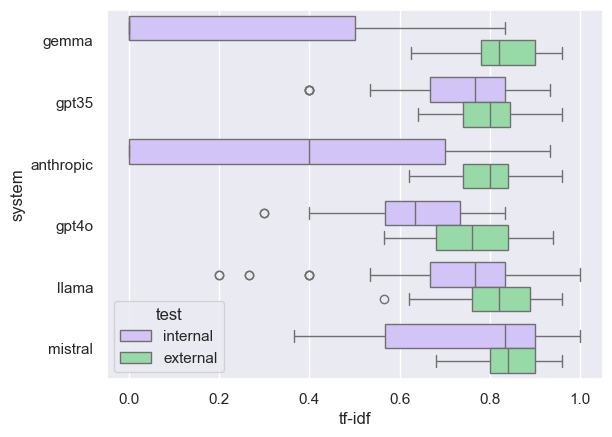

In [122]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid", palette="pastel")
jaccard = pd.DataFrame({"system": all_sys+all_sys2, "tf-idf": all_taus+all_taus2, "test": ['internal']*len(all_sys)+['external']*len(all_sys2)})
sns.boxplot(data=jaccard, x="tf-idf", y="system", hue="test", palette=["m", "g"])
#sns.violinplot(data=jaccard, x="Jaccard similarity", y="system", split=True, inner="quart")
#sns.set_style("darkgrid")
#g = sns.violinplot(data=jaccard, x="Jaccard Similarity", y="system", inner="point")
#g.set(xlim=(0, 1))